<a href="https://colab.research.google.com/github/Yunseokjin/Final-Team1/blob/main/(%EC%A0%84%EC%B2%98%EB%A6%AC%ED%8C%8C%EC%9D%BC)%EA%B0%80%EC%84%A4_5_%22%EB%A6%AC%EB%B7%B0%EC%96%B4%EC%9D%98_%EC%84%B1%EC%9E%A5%EA%B3%BC_%EB%B3%80%ED%99%94_%EC%B2%AB_%EB%A6%AC%EB%B7%B0_vs_%EC%B5%9C%EA%B7%BC_%EB%A6%AC%EB%B7%B0_%ED%8C%A8%ED%84%B4_%EB%B6%84%EC%84%9D%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.라이브러리

In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

# 표에서 ('-') 마이너스 표시
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
# 필수 라이브러리 설치
!pip install konlpy -q
!pip install nltk -q

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("NLTK 필수 데이터를 다운로드합니다...")
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True) # <<< 문제 해결을 위한 핵심 코드
print("NLTK 데이터 준비 완료.")

NLTK 필수 데이터를 다운로드합니다...
NLTK 데이터 준비 완료.


# 1.데이터 준비

In [ ]:
# ==============================================================================
# 1단계 (★★★★★ 최종 수정 ★★★★★): 올바른 timestamp 처리
# ==============================================================================
print("\n--- 1단계: 데이터 준비 시작 ---")

# 1. 데이터 로드
df = pd.read_csv('/content/weighted_score_above_08_250924.csv')
print(f"전체 리뷰 수 (로드 직후): {len(df)}")

# 2. ★★★ 핵심: 필수 칼럼 클리닝 ★★★
# author_steamid만 숫자로 변환하고 NaN 제거
df['author_steamid'] = pd.to_numeric(df['author_steamid'], errors='coerce')
df.dropna(subset=['author_steamid'], inplace=True)
df['author_steamid'] = df['author_steamid'].astype('int64')

# ★★★★★ (수정) timestamp_created를 문자열에서 바로 datetime으로 변환 ★★★★★
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], errors='coerce')
df.dropna(subset=['timestamp_created'], inplace=True) # 변환 실패한 행 제거
print(f"필수 칼럼 클리닝 후 리뷰 수: {len(df)}")


--- 1단계: 데이터 준비 시작 ---
전체 리뷰 수 (로드 직후): 188273
필수 칼럼 클리닝 후 리뷰 수: 188273


# 2.비교그룹 생성

In [ ]:
# ==============================================================================
# 2단계: 비교 그룹 생성
# ==============================================================================
print("\n--- 2단계: 비교 그룹 생성 시작 ---")

df_first = df_target_users.groupby('author_steamid').head(1)
df_experienced = df_target_users.groupby('author_steamid').tail(3)
print(f"'첫 리뷰' 그룹 샘플 수: {len(df_first)}")
print(f"'마지막 3개 숙련된 리뷰' 그룹 샘플 수: {len(df_experienced)}")


--- 2단계: 비교 그룹 생성 시작 ---
'첫 리뷰' 그룹 샘플 수: 1747
'마지막 3개 숙련된 리뷰' 그룹 샘플 수: 5241


# 3.그룹별비교분석


--- 3단계: 그룹별 비교 분석 시작 ---

[분석 1: 평가 관대함 비교 (긍정 리뷰 비율)]
첫 리뷰 그룹의 긍정 리뷰 비율: 93.30%
숙련된 리뷰 그룹의 긍정 리뷰 비율: 91.30%

[분석 2: 리뷰 스타일 비교 (리뷰 길이 - 단어 수)]
첫 리뷰 그룹의 평균 리뷰 길이: 69.6 단어
숙련된 리뷰 그룹의 평균 리뷰 길이: 70.0 단어


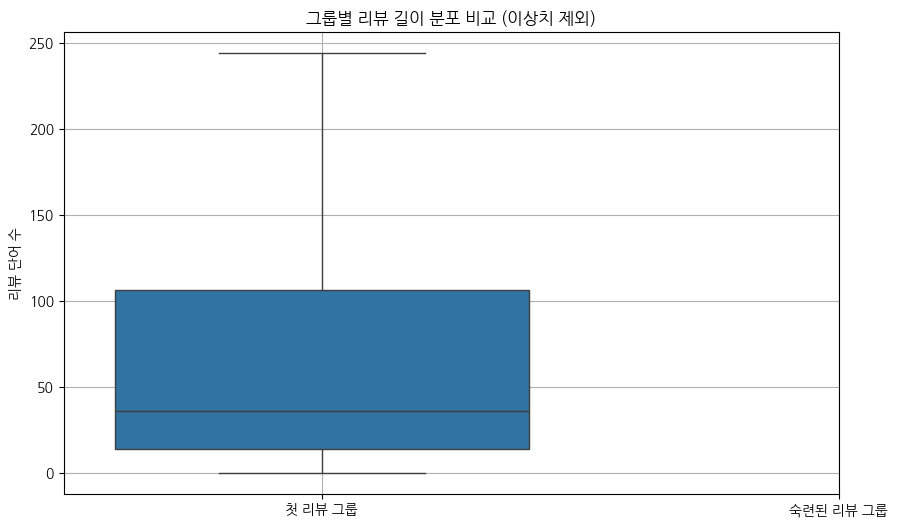

In [ ]:
# ==============================================================================
# 3단계: 그룹별 비교 분석
# ==============================================================================
print("\n--- 3단계: 그룹별 비교 분석 시작 ---")
# (이하 분석 코드는 모두 정상적으로 작동합니다)
# ... (이전과 동일한 분석 코드) ...
first_positive_ratio = df_first['voted_up'].mean()
exp_positive_ratio = df_experienced['voted_up'].mean()
print("\n[분석 1: 평가 관대함 비교 (긍정 리뷰 비율)]")
print(f"첫 리뷰 그룹의 긍정 리뷰 비율: {first_positive_ratio:.2%}")
print(f"숙련된 리뷰 그룹의 긍정 리뷰 비율: {exp_positive_ratio:.2%}")

df_first['review_length'] = df_first['translated_en'].str.split().str.len().fillna(0)
df_experienced['review_length'] = df_experienced['translated_en'].str.split().str.len().fillna(0)
print("\n[분석 2: 리뷰 스타일 비교 (리뷰 길이 - 단어 수)]")
print(f"첫 리뷰 그룹의 평균 리뷰 길이: {df_first['review_length'].mean():.1f} 단어")
print(f"숙련된 리뷰 그룹의 평균 리뷰 길이: {df_experienced['review_length'].mean():.1f} 단어")

plt.figure(figsize=(10, 6))
sns.boxplot(data=[df_first['review_length'], df_experienced['review_length']], showfliers=False)
plt.xticks([0, 1], ['첫 리뷰 그룹', '숙련된 리뷰 그룹'])
plt.title('그룹별 리뷰 길이 분포 비교 (이상치 제외)')
plt.ylabel('리뷰 단어 수')
plt.grid(True)
plt.show()

# 4.그룹별 부정리뷰 키워드

In [ ]:
# ==============================================================================
# 3-3. (최종 수정) '부정 리뷰' 키워드 재분석 (불용어 강화)
# ==============================================================================
print("\n[분석 3 (최종 수정): '부정 리뷰' 내용 비교 (핵심 키워드)]")

# 1. NLP 분석 함수 및 객체 정의 (이전과 동일)
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

okt = Okt()
lemmatizer = nltk.stem.WordNetLemmatizer()
def english_tokenizer(text):
    tokens = nltk.word_tokenize(str(text))
    return [lemmatizer.lemmatize(word) for word in tokens if len(word) > 1]
def korean_tokenizer(text):
    tokens = okt.pos(str(text), stem=True)
    return [word for word, pos in tokens if pos in ['Noun', 'Verb', 'Adjective'] and len(word) > 1]

# 2. 부정 리뷰 데이터 준비 (이전과 동일)
df_first_neg = df_first[df_first['voted_up'] == 0]
df_experienced_neg = df_experienced[df_experienced['voted_up'] == 0]
print(f"\n'첫 부정 리뷰' 샘플 수: {len(df_first_neg)}")
print(f"'숙련된 부정 리뷰' 샘플 수: {len(df_experienced_neg)}")


# (이하 키워드 추출 로직은 동일)
def extract_top_keywords(corpus, tokenizer_func, stop_words, top_n=15):
    if len(corpus) < 2: return [], []
    vectorizer = TfidfVectorizer(tokenizer=tokenizer_func, stop_words=stop_words, max_features=1000, min_df=2)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    scores_first = tfidf_matrix[0].toarray().flatten()
    scores_exp = tfidf_matrix[1].toarray().flatten()
    top_indices_first = scores_first.argsort()[-top_n:][::-1]
    top_keywords_first = [feature_names[idx] for idx in top_indices_first]
    top_indices_exp = scores_exp.argsort()[-top_n:][::-1]
    top_keywords_exp = [feature_names[idx] for idx in top_indices_exp]
    return top_keywords_first, top_keywords_exp


# ★★★★★ (수정) 불용어 사전 강화 ★★★★★

# 영어(번역본) 부정 리뷰 분석
en_stop_words = list(nltk.corpus.stopwords.words('english'))
# 기본 불용어 + 1차 분석에서 나온 공통 키워드 추가
en_stop_words.extend([
    'game', 'play', 'player', 'get', 'go', 'like', 'one', 'time', 'even', 'make', 'good', 'wa', 'ha', 'would',
    'first', 'see', 'played', 'still', 'really', 'people', 'new', 'year', 'buy', 'going', 'need'
])
corpus_first_en_neg = ' '.join(df_first_neg[df_first_neg['language'] != 'koreana']['translated_en'].dropna())
corpus_exp_en_neg = ' '.join(df_experienced_neg[df_experienced_neg['language'] != 'koreana']['translated_en'].dropna())
keywords_first_en_neg, keywords_exp_en_neg = extract_top_keywords([corpus_first_en_neg, corpus_exp_en_neg], english_tokenizer, en_stop_words)

# 한국어 부정 리뷰 분석
ko_stop_words = [
    '게임', '플레이', '유저', '하다', '있다', '되다', '없다', '이다', '같다', '그냥', '너무',
    # 1차 분석에서 나온 공통 키워드 추가
    '않다', '생각', '진짜', '크다', '부분', '때문', '일단', '이상', '어떻다', '보다', '나오다', '이건', '아니다',
    # 욕설

]
corpus_first_ko_neg = ' '.join(df_first_neg[df_first_neg['language'] == 'koreana']['translated_en'].dropna())
corpus_exp_ko_neg = ' '.join(df_experienced_neg[df_experienced_neg['language'] == 'koreana']['translated_en'].dropna())
keywords_first_ko_neg, keywords_exp_ko_neg = extract_top_keywords([corpus_first_ko_neg, corpus_exp_ko_neg], korean_tokenizer, ko_stop_words)


# --- 최종 결과 출력 ---
print("\n--- 영어(번역본) '부정 리뷰' 고유 키워드 비교 ---")
print(f"[첫 부정 리뷰 그룹]: {keywords_first_en_neg}")
print(f"[숙련된 부정 리뷰 그룹]: {keywords_exp_en_neg}")

print("\n--- 한국어 '부정 리뷰' 고유 키워드 비교 ---")
print(f"[첫 부정 리뷰 그룹]: {keywords_first_ko_neg}")
print(f"[숙련된 부정 리뷰 그룹]: {keywords_exp_ko_neg}")


[분석 3 (최종 수정): '부정 리뷰' 내용 비교 (핵심 키워드)]

'첫 부정 리뷰' 샘플 수: 117
'숙련된 부정 리뷰' 샘플 수: 456

--- 영어(번역본) '부정 리뷰' 고유 키워드 비교 ---
[첫 부정 리뷰 그룹]: ['world', 'want', 'price', 'way', 'problem', 'please', 'arcade', 'best', 'know', 'also', 'enemy', 'give', 'away', 'find', 'playing']
[숙련된 부정 리뷰 그룹]: ['point', 'dlc', 'official', 'chinese', 'fancy', 'release', 'gameplay', 'original', 'character', 'version', 'also', 'wanted', 'three', 'story', 'back']

--- 한국어 '부정 리뷰' 고유 키워드 비교 ---
[첫 부정 리뷰 그룹]: ['수준', '싶다', '만원', '보고', '이르다', '씨발', '받다', '비교', '바꾸다', '동안', '개발', '가격']
[숙련된 부정 리뷰 그룹]: ['개발', '비교', '이르다', '씨발', '수준', '싶다', '받다', '보고', '바꾸다', '만원', '동안', '가격']


# 5.인사이트

### 첫 리뷰 그룹
    - 영어권 핵심 키워드: price, problem, want, world, enemy
    - 한국어 핵심 키워드: 가격, 만원, 수준, 보고
    - 분석: "이 게임에 지금 당장 돈과 시간을 투자할 가치가 있는가?"

### 숙련된 리뷰 그룹
    - 영어권 핵심 키워드: dlc, official, release, version, original, gameplay, character, story
    - 한국어 핵심 키워드: 개발, 비교
    - 분석: "이 게임의 규칙과 시스템은 얼마나 정교하며, 앞으로도 계속 신뢰하고 즐길 만한가?"
        - 개발 및 운영에 대한 비판 : "정식(official) 서버 관리가 엉망이다", "새로운 버전(version)이 출시(release)되면서 게임이 나빠졌다"
        - 콘텐츠 깊이에 대한 분석 : dlc, original, gameplay
        - 외부 요인 : chinese(커뮤니티 or 핵 관련 문제일 가능성)

### 결론

- 리뷰 경험을 쌓으면서 게임을 평가하는 관점이 변화하는 것은 보편적인 성장 패턴으로 보인다.
- 성공적인 게임 개발과 운영을 위해서, '첫인상'과 '깊이'를 모두 잡는 전략이 필요